In [1]:
import pandas as pd
import os
import numpy as np
import requests
from fredapi import Fred
import json
import matplotlib.pyplot as plt


In [57]:
key_path  = "C:\\Users\\jabob\\fred\\key\\fred_key.json"

with open(key_path) as f:
    config = json.load(f)

key = config['fred_key']

fred = Fred(api_key=key)

sp500 = fred.get_series('SP500')
df = pd.DataFrame(sp500).reset_index()
df.rename(columns={'index': 'date', 0: 'price'}, inplace=True)

df = df[df['date'] > '2020-01-01']
date_data = df['date']
price_data = df['price']
price_data = price_data.astype(float)
data = df[round(price_data).apply(lambda x: x % 2 == 0)]
data

,date,price
1253,2020-01-02,3257.85
1255,2020-01-06,3246.28
1260,2020-01-13,3288.13
1264,2020-01-17,3329.62
1267,2020-01-22,3321.75
...,...,...
2600,2025-03-03,5849.72
2601,2025-03-04,5778.15
2604,2025-03-07,5770.20
2606,2025-03-11,5572.07


C:\Users\jabob\AppData\Local\Temp\ipykernel_19320\840499215.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{y:,.2f}" for y in ax1.get_yticks()])


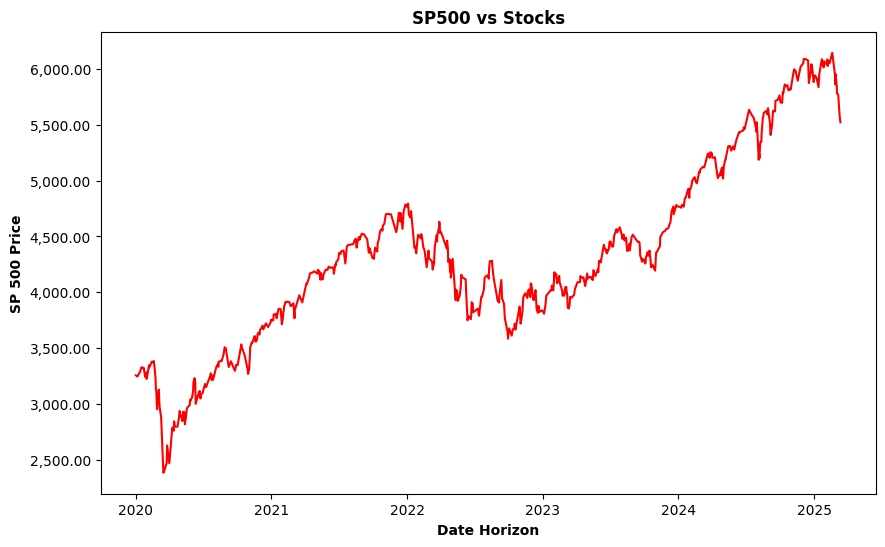

In [58]:
def sp500(dates = date_data, price = price_data):
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Correct way to set figure size
    ax1.plot(data['date'], data['price'], color ='red')
    ax1.set_ylabel('SP 500 Price', fontweight= 'bold')
    ax1.set_xlabel('Date Horizon', fontweight = 'bold')
    ax1.set_title('SP500 vs Stocks', fontweight = 'bold')
    ax1.set_yticklabels([f"{y:,.2f}" for y in ax1.get_yticks()])


sp500()